<a href="https://colab.research.google.com/github/hafluz/sentiment_analysis/blob/main/Project_3_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ChatGPT Sentiment Analysis on Twitter
#### 💬 Twitter Sentiment analysis of ChatGPT involving data scrapping and employing natural language processing models to identify, extract, and classify the overall sentiment towards ChatGPT.

###0. Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
!pip3 install snscrape
import snscrape.modules.twitter as sntwitter
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 5.6 MB/s eta 0:00:00


###1. Scraping Twitter Data

In [ ]:
query = "chatgpt"
tweets = []
limit = 100

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    if len(tweets) == limit:
        break
    else:
        tweets.append([
            tweet.date, 
            tweet.id, 
            tweet.rawContent, 
            tweet.user.username, 
            tweet.likeCount, 
            tweet.retweetCount])

# df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])

# df.to_csv('test.csv', index=False)


In [ ]:
scraper = sntwitter.TwitterSearchScraper("chatgpt")

tweets = []
query= "lang:en"
n_tweets = 20_000

for i, tweet in tqdm(enumerate(scraper.get_items()), total=n_tweets):
    data = [
        tweet.date, 
        tweet.id, 
        tweet.rawContent, 
        tweet.user.username, 
        tweet.likeCount, 
        tweet.retweetCount
    ]
    tweets.append(data)
    if i > n_tweets:
        break

tweet_df = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count"]
)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
tweet_df.shape

(20002, 6)

In [ ]:
# tweet_df = pd.DataFrame(
#     tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count"]
# )

In [ ]:
tweet_df.sample(10)

,date,id,content,username,like_count,retweet_count
14683,2023-02-14 10:50:42+00:00,1625447436058562560,I received this answer from #ChatGPT about #publicspeaking ! #DerayaSpeakers https://t.co/aG5cGz3xLX,hindkhlaifat,1,0
742,2023-02-14 17:20:28+00:00,1625545521208123392,In love with chatGPT! \n\n🙌🏻🙌🏻🙌🏻🙌🏻\n\nTCC VEM AÍ!,polianancruzz,0,1
832,2023-02-14 17:17:50+00:00,1625544859598700558,Microsoft's ChatGPT-like AI just revealed its secret list of rules to a user #tech #AI #idea #developing #invention #innovation #technology #artificialintelligeance #machinelearning https://t.co/Z...,Charlot19408257,1,0
10276,2023-02-14 13:02:03+00:00,1625480490504404993,"When a 22-year-old college student prodded ChatGPT to assume the persona of a devil-may-care alter ego — called “DAN,” for “Do Anything Now” — it answered. https://t.co/lsdSOHAwrp",jbhall56,0,0
10853,2023-02-14 12:45:59+00:00,1625476446914240513,【Chat GPT】使ってみると面白い！超優秀なコンシェルジュが回答してくれる！ https://t.co/FvL4aVjvCt,Toushi_US_Stock,0,0
10702,2023-02-14 12:50:51+00:00,1625477669788823555,¿Merece la pena #ChatGPT plus? Os leo,InteraccionaCom,0,0
9829,2023-02-14 13:14:35+00:00,1625483646348980227,chatgpt gracias por esitir,juanmatejera,1,0
2859,2023-02-14 16:17:40+00:00,1625529718240956422,@KenBromfield1 Manual/ trained staff were flexible and could flit between jobs.\n\nAutomation is now approaching the stage where one machine (humanoid robot c.10 years off) plus advanced AI (it's ...,Brexit_Refugee,0,0
10115,2023-02-14 13:07:00+00:00,1625481737592532993,@lessin Is there a new ChatGPT fork trained only on conversations VCs have with each other,lucasmtny,2,0
2230,2023-02-14 16:35:29+00:00,1625534202400718855,Steirischer Neos-Klubobmann Swatek mit Chat-GPT-Rede im Landtag: https://t.co/oJ9gv2SoHw,derStandardat,2,2


In [ ]:
from google.colab import files

tweet_df.to_csv('sentiment_dataset.csv', index=False, encoding = 'utf-8-sig') 
files.download('sentiment_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Sentiment Analysis

####2.1. NLTK: Natural Language Toolkit

In [ ]:
df = pd.read_csv("sentiment_dataset.csv")
print(df.shape)
# df = df.head(1000)
# print(df.shape)

(20004, 6)


In [ ]:
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-02-14 17:44:39+00:00,1625551607675949058,vocês falando de chatgpt pra cá e pra lá e eu ...,navinavillera,0.0,0.0
1,2023-02-14 17:44:36+00:00,1625551598201208832,I just wrote an ad for a client using ChatGPT ...,techiebutterfly,0.0,0.0
2,2023-02-14 17:44:32+00:00,1625551579679166464,"At this rate, ChatGPT is going to complete my ...",nsawkar7,0.0,0.0
3,2023-02-14 17:44:32+00:00,1625551579339231244,Cómo es que nadie había podido hacer algo como...,malditogenio,0.0,0.0
4,2023-02-14 17:44:30+00:00,1625551573035147270,Nervous … like we need more to worry about #Ch...,keystoslim,0.0,0.0


Text(0.5, 0, 'Number of Likes')

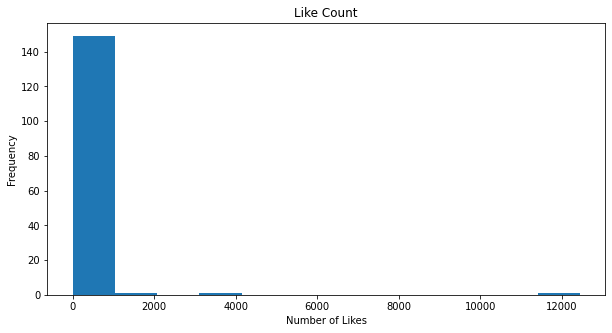

In [ ]:
 ax = df['like_count'].value_counts().sort_index() \
      .plot(kind='hist',
            bins=12,
            title='Like Count',
            figsize=(10,5))
ax.set_xlabel('Number of Likes')

In [ ]:
example = df['content'][50]
print(example)

2/13
With the proliferation of tools like #ChatGPT we end up with a ton of of ‘carb-loaded' content that fills you up in the short-term, but leaves you feeling hungry afterwards.

But you can be different,


In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['2/13',
 'With',
 'the',
 'proliferation',
 'of',
 'tools',
 'like',
 '#',
 'ChatGPT',
 'we']

In [ ]:
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('2/13', 'CD'),
 ('With', 'IN'),
 ('the', 'DT'),
 ('proliferation', 'NN'),
 ('of', 'IN'),
 ('tools', 'NNS'),
 ('like', 'IN'),
 ('#', '#'),
 ('ChatGPT', 'NNP'),
 ('we', 'PRP')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  2/13/CD
  With/IN
  the/DT
  proliferation/NN
  of/IN
  tools/NNS
  like/IN
  #/#
  ChatGPT/NNP
  we/PRP
  end/VBP
  up/RP
  with/IN
  a/DT
  ton/NN
  of/IN
  of/IN
  ‘/JJ
  carb-loaded/JJ
  '/POS
  content/NN
  that/IN
  fills/VBZ
  you/PRP
  up/RP
  in/IN
  the/DT
  short-term/JJ
  ,/,
  but/CC
  leaves/VBZ
  you/PRP
  feeling/VBG
  hungry/JJ
  afterwards/NNS
  ./.
  But/CC
  you/PRP
  can/MD
  be/VB
  different/JJ
  ,/,)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


####2.2. VADER: Valence Aware Dictionary and sEntiment Reasoner

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["content"]
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/20004 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders.head()

,id,neg,neu,pos,compound
0,1625551607675949058,0.000,1.000,0.000,0.0000
1,1625551598201208832,0.076,0.679,0.245,0.7351
2,1625551579679166464,0.000,1.000,0.000,0.0000
3,1625551579339231244,0.000,1.000,0.000,0.0000
4,1625551573035147270,0.357,0.474,0.169,-0.4173


In [ ]:
# Merging sentiment scores and metadata

vaders = vaders.merge(df, how='left')
vaders.head()

,id,neg,neu,pos,compound,date,content,username,like_count,retweet_count
0,1625551607675949058,0.000,1.000,0.000,0.0000,2023-02-14 17:44:39+00:00,vocês falando de chatgpt pra cá e pra lá e eu ...,navinavillera,0.0,0.0
1,1625551598201208832,0.076,0.679,0.245,0.7351,2023-02-14 17:44:36+00:00,I just wrote an ad for a client using ChatGPT ...,techiebutterfly,0.0,0.0
2,1625551579679166464,0.000,1.000,0.000,0.0000,2023-02-14 17:44:32+00:00,"At this rate, ChatGPT is going to complete my ...",nsawkar7,0.0,0.0
3,1625551579339231244,0.000,1.000,0.000,0.0000,2023-02-14 17:44:32+00:00,Cómo es que nadie había podido hacer algo como...,malditogenio,0.0,0.0
4,1625551573035147270,0.357,0.474,0.169,-0.4173,2023-02-14 17:44:30+00:00,Nervous … like we need more to worry about #Ch...,keystoslim,0.0,0.0


In [ ]:
vaders['compound'].isnull().sum()

0

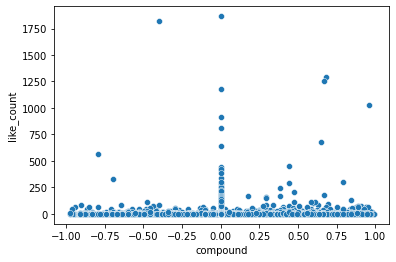

In [ ]:
ax = sns.scatterplot(data=vaders, x='compound', y='like_count')
ax.set_title('')
plt.show()

Text(0.5, 0, 'Compound')

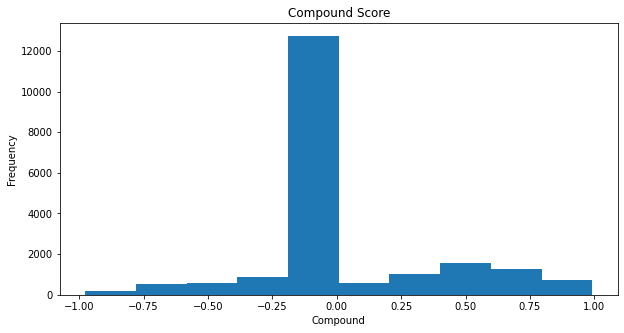

In [ ]:
ax = vaders['compound'] \
      .plot(kind='hist',
            bins=10,
            title='Compound Score',
            figsize=(10,5))
ax.set_xlabel('Compound')

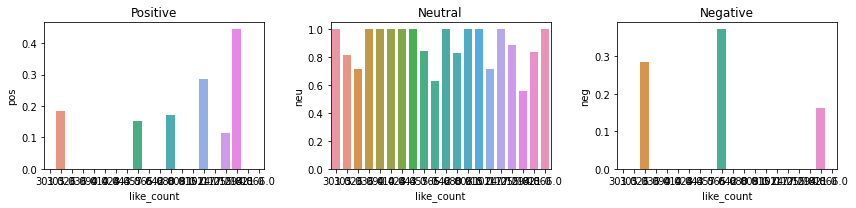

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders.sort_values('like_count', ascending=False).head(20), x='like_count', y='pos', ax=axs[0])
sns.barplot(data=vaders.sort_values('like_count', ascending=False).head(20), x='like_count', y='neu', ax=axs[1])
sns.barplot(data=vaders.sort_values('like_count', ascending=False).head(20), x='like_count', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

####2.3. RoBERTa: Robustly Optimized BERT Approach

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.3 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

2/13
With the proliferation of tools like #ChatGPT we end up with a ton of of ‘carb-loaded' content that fills you up in the short-term, but leaves you feeling hungry afterwards.

But you can be different,


{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.3612}

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.4199719, 'roberta_neu': 0.4693389, 'roberta_pos': 0.11068914}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['content']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/20004 [00:00<?, ?it/s]

Broke for id 1625446528390426624


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,content,username,like_count,retweet_count
0,1625551607675949058,0.000,1.000,0.000,0.0000,0.114373,0.846888,0.038740,2023-02-14 17:44:39+00:00,vocês falando de chatgpt pra cá e pra lá e eu ...,navinavillera,0.0,0.0
1,1625551598201208832,0.076,0.679,0.245,0.7351,0.002731,0.026345,0.970925,2023-02-14 17:44:36+00:00,I just wrote an ad for a client using ChatGPT ...,techiebutterfly,0.0,0.0
2,1625551579679166464,0.000,1.000,0.000,0.0000,0.020951,0.474741,0.504308,2023-02-14 17:44:32+00:00,"At this rate, ChatGPT is going to complete my ...",nsawkar7,0.0,0.0
3,1625551579339231244,0.000,1.000,0.000,0.0000,0.083625,0.873103,0.043272,2023-02-14 17:44:32+00:00,Cómo es que nadie había podido hacer algo como...,malditogenio,0.0,0.0
4,1625551573035147270,0.357,0.474,0.169,-0.4173,0.608864,0.355364,0.035772,2023-02-14 17:44:30+00:00,Nervous … like we need more to worry about #Ch...,keystoslim,0.0,0.0


Combining and Comparing Vader and RoBERTa Models

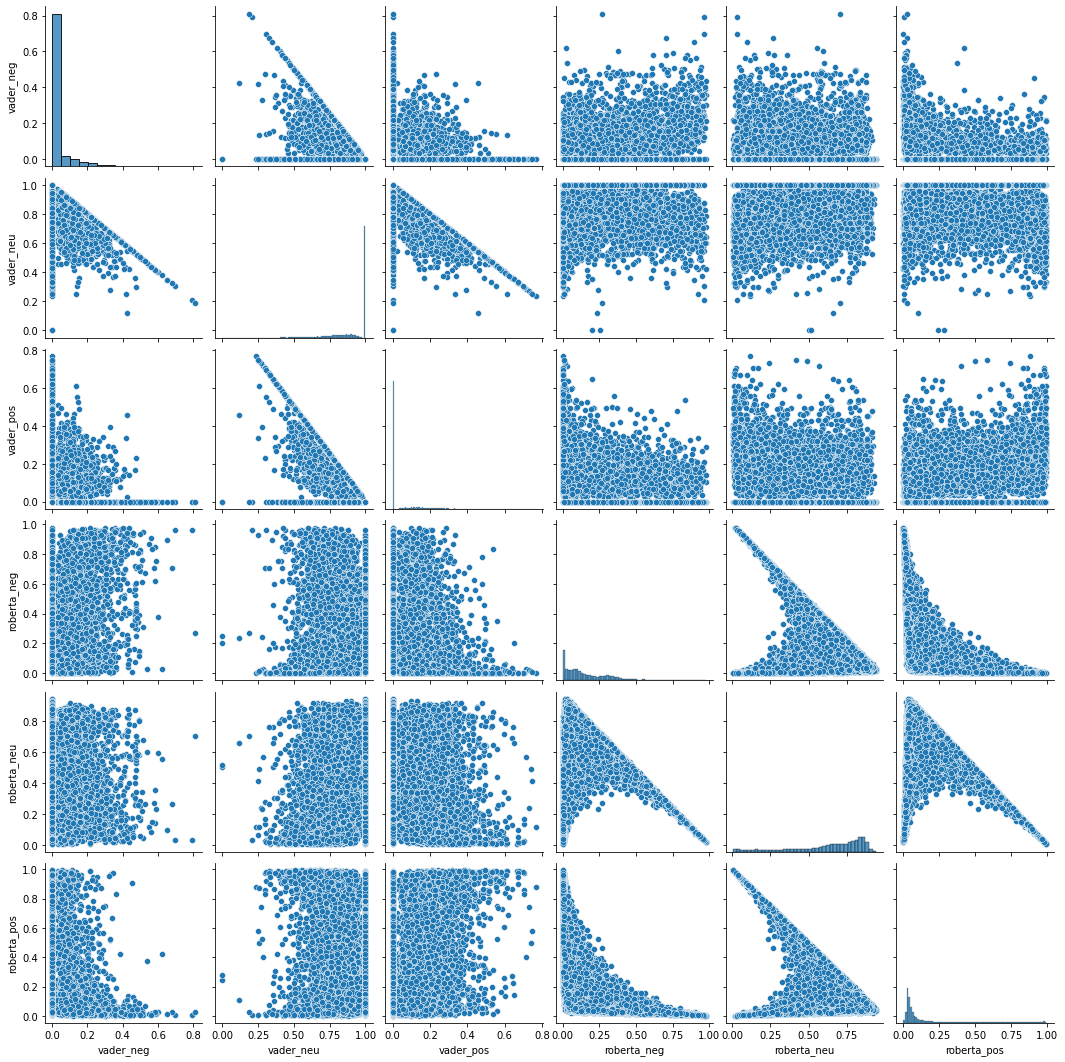

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg' ,'roberta_neu', 'roberta_pos'],
             palette='tab10')


In [ ]:
# Most Positive Tweet According to Roberta

results_df.sort_values('roberta_pos', ascending=False)['content'].values[0]

"Feeling the love this Valentine's Day thanks to ChatGPT's incredible poetic skills! 😍\n\nThe #eddress team couldn't be happier with the personalized poem that perfectly captures our essence. \n\nThank you, #ChatGPT! 🦾 and Happy Valentine's day 💘 https://t.co/L4FGCVhMvg"

In [ ]:
# Most Positive Tweet According to Vader

results_df.sort_values('vader_pos', ascending=False)['content'].values[0]

'Impressive #ChatGPT'

In [ ]:
# Most Negative Tweet According to Roberta

results_df.sort_values('roberta_neg', ascending=False)['content'].values[0]

'More than anything, my experiment with ChatGPT was tedious and annoying.'

In [ ]:
# Most Negative Tweet According to Vader

results_df.sort_values('vader_neg', ascending=False)['content'].values[0]

'#ChatGPT dead ?'

#### 2.4. Transformers Pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
def sentiment(content):
    outcome = sent_pipeline(content)[0].get("label")
    return outcome
result = lambda x:sentiment(x)

In [ ]:
df["Sentiment"] = df["content"].map(result)

In [ ]:
df["Sentiment"].value_counts()

NEGATIVE    17492
POSITIVE     2512
Name: Sentiment, dtype: int64

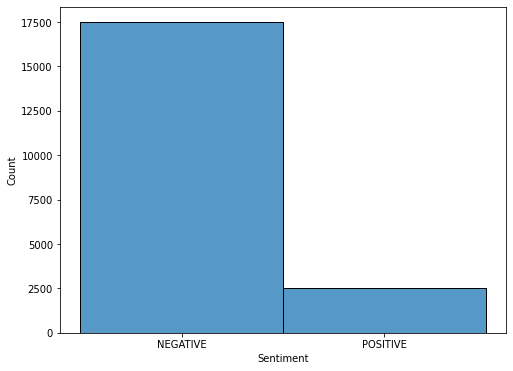

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(x=df["Sentiment"], data = df)

#### **2.6**. TextBlob: Polarity and Subjectivity

In [ ]:
from textblob import TextBlob
!pip3 install jsonpickle
import jsonpickle
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 2.8 MB/s eta 0:00:00


In [ ]:
tweets = df['content']
print(tweets[2])
print(TextBlob(tweets[2]).sentiment)

At this rate, ChatGPT is going to complete my capstone project as well😭
Sentiment(polarity=0.1, subjectivity=0.4)


In [ ]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


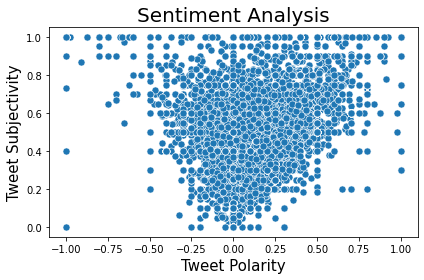

In [ ]:
sns.scatterplot(tweet_polarity,
                tweet_subjectivity,  
                s=50);

plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('Tweet Polarity', fontsize=15)
plt.ylabel('Tweet Subjectivity', fontsize=15)
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


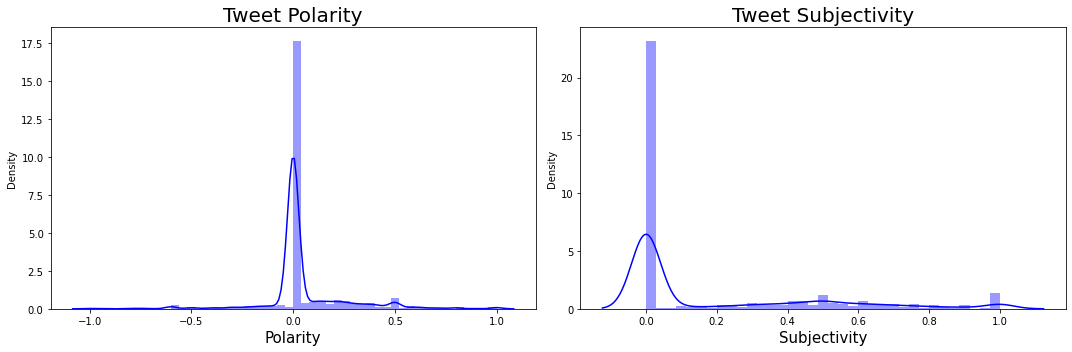

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('Polarity', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('Subjectivity', fontsize=15)

plt.tight_layout()

####2.5. WordCloud

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import matplotlib.pyplot as plt

In [ ]:
token = WordPunctTokenizer()
def cleaning_tweets(twt):
    twt = re.sub('#[A-Za-z0-9]+ ','', twt) #removes any string with a '#' character
    twt = re.sub('\\n', '', twt)
    twt = re.sub('&;','and',twt)
    twt = re.sub('@[A-Za-z0-9]+ ','', twt)
    twt = re.sub('https?:\/\/\S+','',twt) #Removes any hyperlinks
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    twt = re.sub(regex_pattern,'',twt)
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    twt = re.sub(pattern,'',twt)
    re_list = ['@[A-Za-z0-9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    twt = re.sub(combined_re,'',twt)
    del_amp = BeautifulSoup(twt, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,20000):
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,20000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.content[i])))

In [ ]:
df.content.sample(5)

19346                                                                                                                                                                                            What is chatGPT
13316    Happy #ValentinesDay to @ll, here it's a small peak of what you can do with #Gunbot and his #chatGPT integration, only possible with the most professional #crypto #trading bot, now with "buy one g...
14913    The smallest thing that we can do for others on Valentine’s Day is to make them feel loved. Happy Valentine’s Day.\n\n#projectmanagement  #softwaredevelopment #qualityassurance  #chatgpt #tech #we...
11456                                                               @gatewaypundit Really! Why doesn’t that FOOL ask ChatGPT, an AI app, what is a woman? Positive things about Republicans? Anything Christian?
10826                                                                                                                       @cliclaclavicula @Blocher_Perlen 👍🏻👏🏻 Su

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["t","https","que","de","co","en","y","el","para","▯"]) #adding our own stopwords

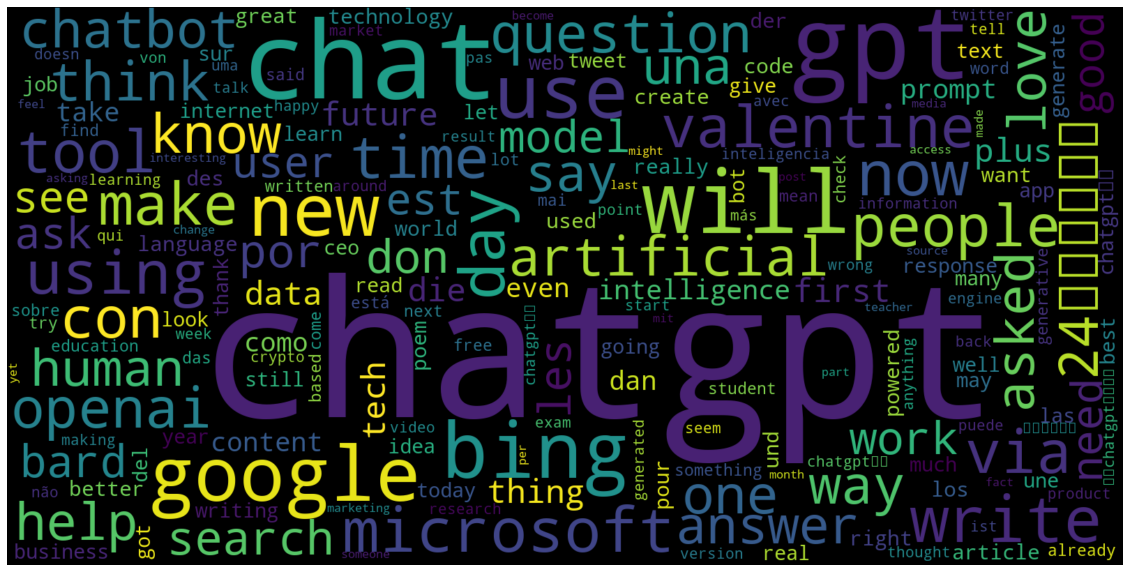

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 200 , width = 1600 , height = 800,
               collocations=False).generate(string)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()